# ＰＢＲ１倍割れ解消 日足

In [1]:
import sys
sys.path.append('..')

import re

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar

In [2]:
pattern = re.compile(r'(.+)\.T')

symbol = '2080.T'
ticker = yf.Ticker(symbol)

df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2024-09-05 00:00:00+09:00,1103.481319,1125.921700,1094.700301,1106.408325,77640,0.00,0.0,0.0
2024-09-06 00:00:00+09:00,1111.286717,1116.165061,1096.651686,1101.530029,91413,0.00,0.0,0.0
2024-09-09 00:00:00+09:00,1070.000000,1095.000000,1070.000000,1090.000000,171599,27.47,0.0,0.0
2024-09-10 00:00:00+09:00,1100.000000,1105.000000,1088.000000,1088.000000,60483,0.00,0.0,0.0
2024-09-11 00:00:00+09:00,1080.000000,1080.000000,1056.000000,1064.000000,110492,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-02-27 00:00:00+09:00,1205.000000,1217.000000,1205.000000,1216.000000,20879,0.00,0.0,0.0
2025-02-28 00:00:00+09:00,1209.000000,1214.000000,1200.000000,1203.000000,33393,0.00,0.0,0.0
2025-03-03 00:00:00+09:00,1210.000000,1223.000000,1210.000000,1220.000000,146507,0.00,0.0,0.0


## 日足チャートとパラボリック SAR

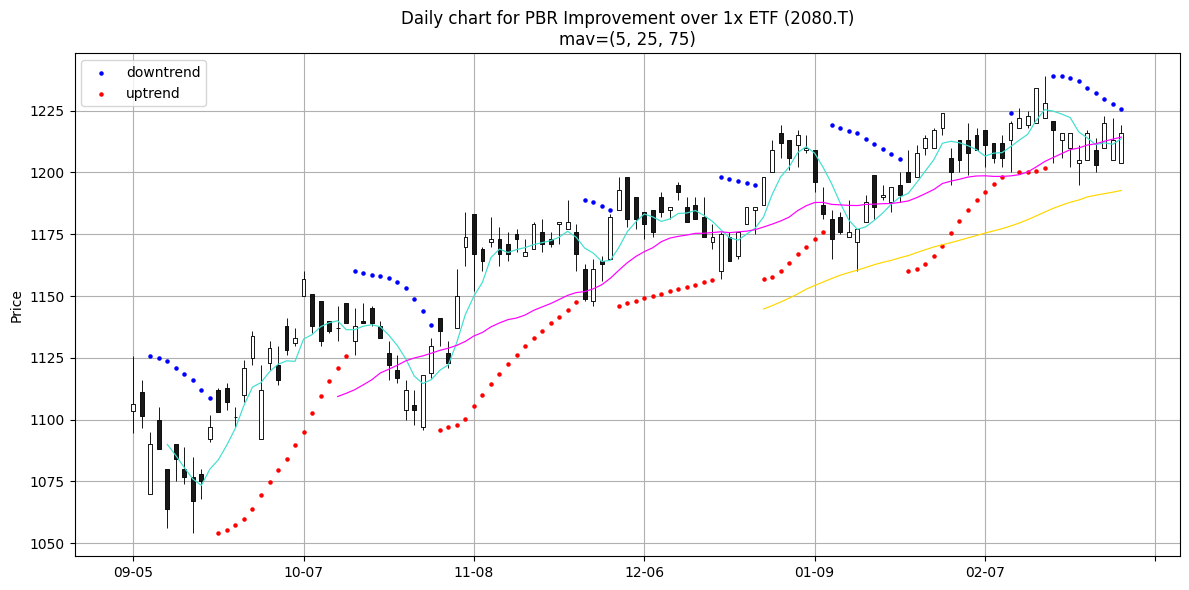

In [3]:
dict_psar = psar(df)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

apds  = [
    mpf.make_addplot(
        dict_psar['bear'],
        type='scatter',
        marker='o',
        markersize=5,
        color='blue',
        label='downtrend',
        ax=ax
    ),
    mpf.make_addplot(
        dict_psar['bull'],
        type='scatter',
        marker='o',
        markersize=5,
        color='red',
        label='uptrend',
        ax=ax
    ),
] 

mpf.plot(
    df,
    type='candle',
    style='default',
    mav=(5, 25, 75),
    volume=False,
    datetime_format='%m-%d',
    addplot=apds,
    xrotation=0,
    ax=ax,
)

try:
    ax.set_title('Daily chart for %s (%s)\nmav=(5, 25, 75)' % (ticker.info['longName'], symbol))
except KeyError:
    ax.set_title('Daily chart for %s\nmav=(5, 25, 75)' % symbol)

ax.grid()

plt.tight_layout()

m = pattern.match(symbol)
if m:
    plt.savefig('daily_chart_%s.png' % m.group(1))
else:
    plt.savefig('daily_chart_%s.png' % symbol)

plt.show()

In [4]:
df.tail(2)['Close']

Date
2025-03-04 00:00:00+09:00    1213.0
2025-03-05 00:00:00+09:00    1213.0
Name: Close, dtype: float64

In [5]:
df.tail(2)['Close'].diff()

Date
2025-03-04 00:00:00+09:00    NaN
2025-03-05 00:00:00+09:00    0.0
Name: Close, dtype: float64

In [6]:
df['Close'].rolling(5).mean().tail(2)

Date
2025-03-04 00:00:00+09:00    1211.4
2025-03-05 00:00:00+09:00    1213.0
Name: Close, dtype: float64

In [7]:
df['Close'].rolling(25).mean().tail(2)

Date
2025-03-04 00:00:00+09:00    1213.48
2025-03-05 00:00:00+09:00    1214.16
Name: Close, dtype: float64

In [8]:
df['Close'].rolling(75).mean().tail(2)

Date
2025-03-04 00:00:00+09:00    1192.013333
2025-03-05 00:00:00+09:00    1192.666667
Name: Close, dtype: float64